# Thank you to Titanic Encyclopedia for the dataset!

### Data Sources: https://www.encyclopedia-titanica.org/
### Image Sources: https://www.encyclopedia-titanica.org/, https://titanicin2012.files.wordpress.com/2012/05/0033-e68bb7e8b49d1.jpg

In [1]:
#Import dependencies
import os, glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import figure, style
style.use('fivethirtyeight')
from tabulate import tabulate

In [2]:
#Pulling data from CSVs
titanic_manifest = "Data & Images- Original/Titanic Passengers and Crew Complete List.csv"

In [3]:
#Read files into pandas and remove title row (2479x16 w/o removal) 2477 x 16
full = pd.read_csv(titanic_manifest, encoding="utf-8", header=1, skipfooter=1, engine ='python')
full.head()

,Name,Born,Died,Age,Gender,Class/Dept,Ticket,Fare,Cabin,Joined,Occupation,Survived?,Boat,Body,Nationality,URL
0,"ABBING, Mr Anthony",1870.0,1912.0,41,Male,3rd Class Passenger,5547,£7 11s,NaN,Southampton,Blacksmith,LOST,NaN,NaN,American,https://www.encyclopedia-titanica.org/titanic-...
1,"ABBOTT, Mr Ernest Owen",1891.0,1912.0,21,Male,Victualling Crew,NaN,NaN,NaN,Southampton,Lounge Pantry Steward,LOST,NaN,NaN,English,https://www.encyclopedia-titanica.org/titanic-...
2,"ABBOTT, Mr Eugene Joseph",1899.0,1912.0,13,Male,3rd Class Passenger,CA2673,£20 5s,NaN,Southampton,Scholar,LOST,NaN,NaN,American,https://www.encyclopedia-titanica.org/titanic-...
3,"ABBOTT, Mr Rossmore Edward",1896.0,1912.0,16,Male,3rd Class Passenger,CA2673,£20 5s,NaN,Southampton,Jeweller,LOST,NaN,190.0,"English, American",https://www.encyclopedia-titanica.org/titanic-...
4,"ABBOTT, Mrs Rhoda Mary 'Rosa'",1873.0,1946.0,39,Female,3rd Class Passenger,CA2673,£20 5s,NaN,Southampton,NaN,SAVED,A,NaN,English,https://www.encyclopedia-titanica.org/titanic-...


## Organize Data

In [4]:
#Drop extra data columns
columns = ['Born',
           'Died',
           'Ticket',
           'Fare',
           'Cabin',
           'Occupation',
           'Boat',
           'Body',
           'URL']

full_drop = full.drop(columns, axis=1)#, inplace=True)
full_drop.head()

,Name,Age,Gender,Class/Dept,Joined,Survived?,Nationality
0,"ABBING, Mr Anthony",41,Male,3rd Class Passenger,Southampton,LOST,American
1,"ABBOTT, Mr Ernest Owen",21,Male,Victualling Crew,Southampton,LOST,English
2,"ABBOTT, Mr Eugene Joseph",13,Male,3rd Class Passenger,Southampton,LOST,American
3,"ABBOTT, Mr Rossmore Edward",16,Male,3rd Class Passenger,Southampton,LOST,"English, American"
4,"ABBOTT, Mrs Rhoda Mary 'Rosa'",39,Female,3rd Class Passenger,Southampton,SAVED,English


In [5]:
#Add columns
full_drop['Type']= ""
full_drop['PersonID'] = full_drop.index + 1
full_drop.head()

,Name,Age,Gender,Class/Dept,Joined,Survived?,Nationality,Type,PersonID
0,"ABBING, Mr Anthony",41,Male,3rd Class Passenger,Southampton,LOST,American,,1
1,"ABBOTT, Mr Ernest Owen",21,Male,Victualling Crew,Southampton,LOST,English,,2
2,"ABBOTT, Mr Eugene Joseph",13,Male,3rd Class Passenger,Southampton,LOST,American,,3
3,"ABBOTT, Mr Rossmore Edward",16,Male,3rd Class Passenger,Southampton,LOST,"English, American",,4
4,"ABBOTT, Mrs Rhoda Mary 'Rosa'",39,Female,3rd Class Passenger,Southampton,SAVED,English,,5


In [6]:
#Rename columns
full_rename = full_drop.rename(columns={'Class/Dept': 'ClassDept','Survived?': 'Survived'})#, inplace=True)
full_rename.head()

,Name,Age,Gender,ClassDept,Joined,Survived,Nationality,Type,PersonID
0,"ABBING, Mr Anthony",41,Male,3rd Class Passenger,Southampton,LOST,American,,1
1,"ABBOTT, Mr Ernest Owen",21,Male,Victualling Crew,Southampton,LOST,English,,2
2,"ABBOTT, Mr Eugene Joseph",13,Male,3rd Class Passenger,Southampton,LOST,American,,3
3,"ABBOTT, Mr Rossmore Edward",16,Male,3rd Class Passenger,Southampton,LOST,"English, American",,4
4,"ABBOTT, Mrs Rhoda Mary 'Rosa'",39,Female,3rd Class Passenger,Southampton,SAVED,English,,5


In [7]:
#Format column order to LAUSD Template
full_order = full_rename[['PersonID',
                          'Name',
                          'Age',
                          'Gender',
                          'Nationality',
                          'Joined',
                          'ClassDept',
                          'Type',
                          'Survived']]
full_order.head()

,PersonID,Name,Age,Gender,Nationality,Joined,ClassDept,Type,Survived
0,1,"ABBING, Mr Anthony",41,Male,American,Southampton,3rd Class Passenger,,LOST
1,2,"ABBOTT, Mr Ernest Owen",21,Male,English,Southampton,Victualling Crew,,LOST
2,3,"ABBOTT, Mr Eugene Joseph",13,Male,American,Southampton,3rd Class Passenger,,LOST
3,4,"ABBOTT, Mr Rossmore Edward",16,Male,"English, American",Southampton,3rd Class Passenger,,LOST
4,5,"ABBOTT, Mrs Rhoda Mary 'Rosa'",39,Female,English,Southampton,3rd Class Passenger,,SAVED


In [8]:
#Find unique count of persons, which is 2477 ('Name' has 10 duplciates, so we cannot use that column)
people = full_order["PersonID"].nunique()
people

2477

In [9]:
#Find unique survived status'
full_order.Survived.unique()

array(['LOST', 'SAVED', nan], dtype=object)

In [10]:
#Find total with survival status, which is 2,208
survival_status_count = full_order.groupby('Survived').count()
survival_status_count

,PersonID,Name,Age,Gender,Nationality,Joined,ClassDept,Type
Survived,,,,,,,,
LOST,1496,1496,1493,1496,1493,1496,1496,1496
SAVED,712,712,711,712,712,712,712,712


## Edit & Plot Ages

In [11]:
#Find unique ages
full_order.Age.unique()

array(['41', '21', '13', '16', '39', '25', '30', '28', '19', '34', '45',
       '38', '27', '26', '20', '40', '24', '31', '37', '10m', '2', '5',
       '3', '23', '35', '22', '29', '11m', '36', '43', '17', '33', '42',
       '50', '4', '6', '9', '11', '62', '53', '18', '71', '57', '47',
       '32', '15', '44', '46', '52', '58', '56', '48', '55', '1', '12',
       '51', '59', '61', nan, '60', '7', '10', '14', '54', '49', '8',
       '64', '66', '70', '4m', '2m', '65', '63', '7m', '9m', '69', '67',
       '74', '5m'], dtype=object)

In [12]:
#Remove rows with blank ages, which leaves 2,450
ages_change = full_order.dropna(subset=['Age'])
ages_change

,PersonID,Name,Age,Gender,Nationality,Joined,ClassDept,Type,Survived
0,1,"ABBING, Mr Anthony",41,Male,American,Southampton,3rd Class Passenger,,LOST
1,2,"ABBOTT, Mr Ernest Owen",21,Male,English,Southampton,Victualling Crew,,LOST
2,3,"ABBOTT, Mr Eugene Joseph",13,Male,American,Southampton,3rd Class Passenger,,LOST
3,4,"ABBOTT, Mr Rossmore Edward",16,Male,"English, American",Southampton,3rd Class Passenger,,LOST
4,5,"ABBOTT, Mrs Rhoda Mary 'Rosa'",39,Female,English,Southampton,3rd Class Passenger,,SAVED
...,...,...,...,...,...,...,...,...,...
2472,2473,"ČULUMOVIć, Mr Jeso",17,Male,Croatian,Southampton,3rd Class Passenger,,LOST
2473,2474,"ḤANNā AL-HāJ, Mr Mansūr",35,Male,Syrian,Cherbourg,3rd Class Passenger,,LOST
2474,2475,"ḤANNā, Mr Mubārik Sulaymān Abī Āsī",27,Male,Syrian,Cherbourg,3rd Class Passenger,,SAVED
2475,2476,"ṬANNūS MU'AWWAD, Mr Ḥannā",34,Male,"Syrian,American",Cherbourg,3rd Class Passenger,,LOST


In [13]:
#Define and change ages from months to decimals and strings to integers
def edit_ages (months):
    if 'm' in months:
        return round(int(months.replace('m', ''))/12,2)
    else:
        return int(months)

In [14]:
#Apply Person Type based on Class/Dept
ages_change['Age'] = ages_change['Age'].apply(edit_ages)
ages_change

<ipython-input-14-e2a71597ec94>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ages_change['Age'] = ages_change['Age'].apply(edit_ages)


,PersonID,Name,Age,Gender,Nationality,Joined,ClassDept,Type,Survived
0,1,"ABBING, Mr Anthony",41.0,Male,American,Southampton,3rd Class Passenger,,LOST
1,2,"ABBOTT, Mr Ernest Owen",21.0,Male,English,Southampton,Victualling Crew,,LOST
2,3,"ABBOTT, Mr Eugene Joseph",13.0,Male,American,Southampton,3rd Class Passenger,,LOST
3,4,"ABBOTT, Mr Rossmore Edward",16.0,Male,"English, American",Southampton,3rd Class Passenger,,LOST
4,5,"ABBOTT, Mrs Rhoda Mary 'Rosa'",39.0,Female,English,Southampton,3rd Class Passenger,,SAVED
...,...,...,...,...,...,...,...,...,...
2472,2473,"ČULUMOVIć, Mr Jeso",17.0,Male,Croatian,Southampton,3rd Class Passenger,,LOST
2473,2474,"ḤANNā AL-HāJ, Mr Mansūr",35.0,Male,Syrian,Cherbourg,3rd Class Passenger,,LOST
2474,2475,"ḤANNā, Mr Mubārik Sulaymān Abī Āsī",27.0,Male,Syrian,Cherbourg,3rd Class Passenger,,SAVED
2475,2476,"ṬANNūS MU'AWWAD, Mr Ḥannā",34.0,Male,"Syrian,American",Cherbourg,3rd Class Passenger,,LOST


In [15]:
#Option 2: non-dynamic months conversion
#replace_ages = {'2m' : 0.08,'4m' : 0.33,'5m' : 0.42,'7m' : 0.58,'9m' : 0.75,'10m' : 0.83,'11m' : 0.92,}   
#full_age = full_order.replace({"Age": replace_ages})

In [16]:
#Check unique ages
ages_change.Age.unique()

array([41.  , 21.  , 13.  , 16.  , 39.  , 25.  , 30.  , 28.  , 19.  ,
       34.  , 45.  , 38.  , 27.  , 26.  , 20.  , 40.  , 24.  , 31.  ,
       37.  ,  0.83,  2.  ,  5.  ,  3.  , 23.  , 35.  , 22.  , 29.  ,
        0.92, 36.  , 43.  , 17.  , 33.  , 42.  , 50.  ,  4.  ,  6.  ,
        9.  , 11.  , 62.  , 53.  , 18.  , 71.  , 57.  , 47.  , 32.  ,
       15.  , 44.  , 46.  , 52.  , 58.  , 56.  , 48.  , 55.  ,  1.  ,
       12.  , 51.  , 59.  , 61.  , 60.  ,  7.  , 10.  , 14.  , 54.  ,
       49.  ,  8.  , 64.  , 66.  , 70.  ,  0.33,  0.17, 65.  , 63.  ,
        0.58,  0.75, 69.  , 67.  , 74.  ,  0.42])

In [17]:
#Place ages data in dataframe
all_ages = ages_change.groupby('Age')['Survived'].value_counts().unstack().fillna(0)
all_ages["Age List"] = pd.cut(all_ages.index,
                              bins=[0,10,20,30,40,50,60,70,80],
                              labels=["0-10 years old",
                                      "11-20",
                                      "21-30",
                                      "31-40",
                                      "41-50",
                                      "51-60",
                                      "61-70",
                                      "71-80 years old"])
group_age = all_ages.groupby('Age List').sum()
age_ready = group_age.reindex(columns=['SAVED','LOST'])
age_ready

Survived,SAVED,LOST
Age List,,
0-10 years old,54.0,45.0
11-20,87.0,228.0
21-30,260.0,539.0
31-40,170.0,392.0
41-50,97.0,199.0
51-60,36.0,57.0
61-70,7.0,28.0
71-80 years old,0.0,5.0


In [18]:
#Find max column sum
age_sum = age_ready.max(axis=1).max()
age_sum

539.0

In [19]:
#Find max column sum
age_max = age_ready.sum(axis=1).max()
age_max

799.0

In [20]:
#Find age data total= 2,204
age_total = age_ready.sum(axis=0)
age_total

Survived
SAVED     711.0
LOST     1493.0
dtype: float64

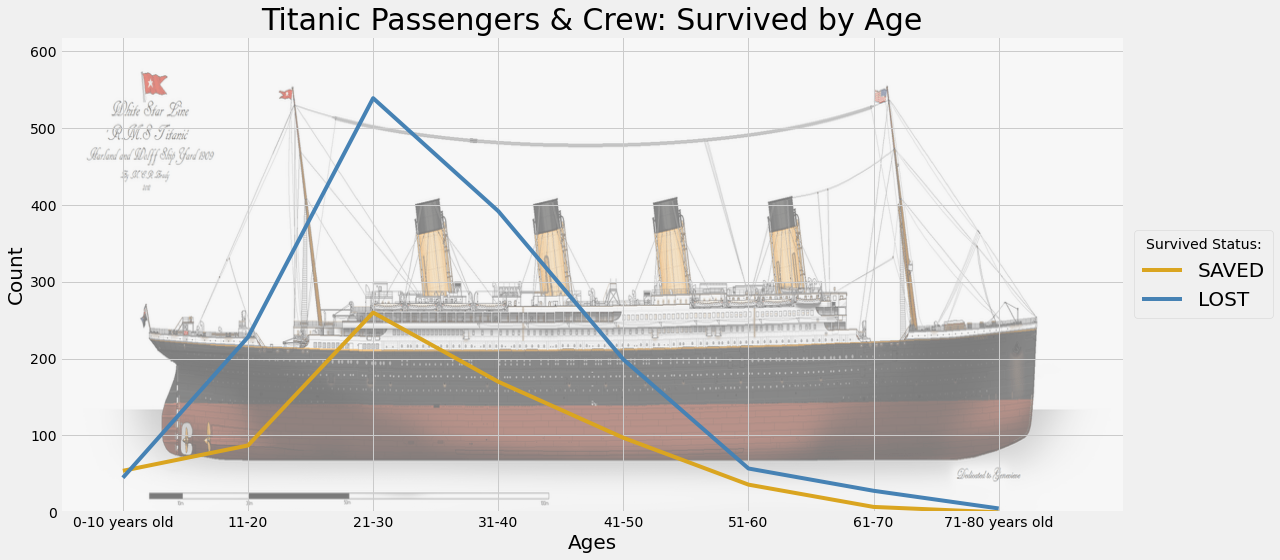

In [21]:
#Plot age data in bar chart
img = plt.imread("Data & Images- Original/TitanicProfile.png")
ax = age_ready.plot.line(subplots=False,figsize=(18,8),
                         stacked=False,color={"SAVED": "goldenrod", "LOST": "steelblue"})
plt.title("Titanic Passengers & Crew: Survived by Age", fontsize = 30)
plt.ylabel("Count", fontsize = 20)
plt.xlabel("Ages", fontsize = 20)
plt.legend(title="Survived Status:",loc='center left',bbox_to_anchor=(1.0,0.5), fontsize = 20)
ax.imshow(img, extent=[-0.5, 8, 0, age_sum*1.15], aspect='auto', alpha=.5)
#extent=(horizontal_min, horizontal_max, vertical_min, vertical_max)
ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 0)
plt.tight_layout()
#plt.grid()
plt.savefig("Data & Images- Results/age_line_plot.png")

## Edit & Plot Gender

In [22]:
#Find unique genders
full_order.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [23]:
#Place gender data in dataframe
group_gender = full_order.groupby('Survived')['Gender'].value_counts().unstack().fillna(0)
gender_ready = group_gender.reindex(['SAVED', 'LOST'])
gender_ready

Gender,Female,Male
Survived,,
SAVED,359,353
LOST,130,1366


In [24]:
#Find gender data total= 2,208
gender_total = gender_ready.sum(axis=0)
gender_total

Gender
Female     489
Male      1719
dtype: int64

In [25]:
#Plot y-axis label formatting
#plt.xticks(rotation=90, horizontalalignment='top')
#plt.set_xticklabels(df.index,rotation=90)
# ax.set_xticks(range(len(lam_beta)))
# ax.set_xticklabels(lam_beta, rotation='vertical')
#plt.set_xticklabels(rotation=90)
# # ax = axs[0]
# axs.set_title('Female')
# ax = axs[1]
# axs.set_title('Male')
#plt.gca().legend_.remove()
#plt.legend(title="Survived Status:", loc='lower right',fontsize=7, bbox_to_anchor = (0.75, -01.0) )
#plt.ylabel(y, fontsize = 50)

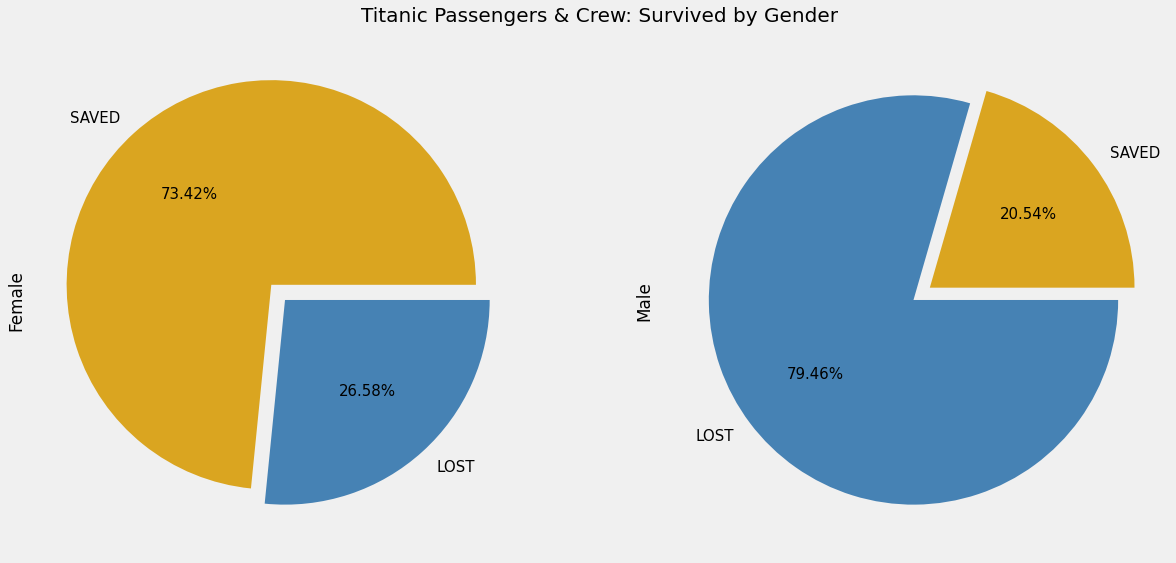

In [26]:
#Plot gender data in two pie charts
colors = ['goldenrod','steelblue']
explode = (0.1,0)
fig, axs = gender_ready.plot.pie(subplots=True,
                                 figsize=(18,8),
                                 colors = colors,
                                 explode = explode,
                                 autopct="%.2f%%",
                                 textprops={'fontsize': 15},
                                 legend=None) #rot=0 'color':"w"
plt.suptitle('Titanic Passengers & Crew: Survived by Gender',fontsize = 20)
# lg = plt.legend(loc="lower right",
#            title="Survived Status:",
#            fancybox=True,
#            ncol=2,
#            shadow=True,
#            fontsize = 15)
# title = lg.get_title()
# lg.get_title().set_fontsize(15)
plt.tight_layout()
plt.savefig("Data & Images- Results/gender_pie_subplots.png")

## Edit & Plot Nationality

In [27]:
#Find count unique Nationalities
full_order.Nationality.nunique()

100

In [28]:
#Find unique Nationalities
full_order.Nationality.unique()

array(['American', 'English', 'English, American', 'Norwegian', 'Russian',
       'Finnish', 'Syrian', 'Channel Islander', 'Swedish', 'Polish',
       'Syrian,American', 'Italian', 'Canadian', 'Danish', 'Scottish',
       'English, Argentinian', 'Irish', 'Swiss', 'Uruguayan', 'Belgian',
       'Swedish, American', 'American, Swedish', 'Swedish,American',
       'French', 'Welsh', 'Bosnian', 'Lithuanian', 'Irish,American',
       'Bulgarian', 'Hong Kongese', 'Dutch', 'English, Canadian', nan,
       'Portuguese', 'South African, English', 'South African',
       'American, Siamese', 'Australian', 'Sweden', 'German', 'Greek',
       'Irish, American', 'Irish, English', 'Austrian', 'German, Irish',
       'Croatian', 'Guyanese', 'Spanish', 'Madeiran, Portuguese',
       'Mexican, American, English', 'German, American',
       'Canadian,American', 'English, Italian', 'Italian, American',
       'Russian, American', 'Norwegian, American', 'Danish,American',
       'Egyptian', 'German, Engli

In [29]:
#Remove rows with blank ages, which leaves 2,447
nations_change = full_order.dropna(subset=['Nationality'])
nations_change

,PersonID,Name,Age,Gender,Nationality,Joined,ClassDept,Type,Survived
0,1,"ABBING, Mr Anthony",41,Male,American,Southampton,3rd Class Passenger,,LOST
1,2,"ABBOTT, Mr Ernest Owen",21,Male,English,Southampton,Victualling Crew,,LOST
2,3,"ABBOTT, Mr Eugene Joseph",13,Male,American,Southampton,3rd Class Passenger,,LOST
3,4,"ABBOTT, Mr Rossmore Edward",16,Male,"English, American",Southampton,3rd Class Passenger,,LOST
4,5,"ABBOTT, Mrs Rhoda Mary 'Rosa'",39,Female,English,Southampton,3rd Class Passenger,,SAVED
...,...,...,...,...,...,...,...,...,...
2472,2473,"ČULUMOVIć, Mr Jeso",17,Male,Croatian,Southampton,3rd Class Passenger,,LOST
2473,2474,"ḤANNā AL-HāJ, Mr Mansūr",35,Male,Syrian,Cherbourg,3rd Class Passenger,,LOST
2474,2475,"ḤANNā, Mr Mubārik Sulaymān Abī Āsī",27,Male,Syrian,Cherbourg,3rd Class Passenger,,SAVED
2475,2476,"ṬANNūS MU'AWWAD, Mr Ḥannā",34,Male,"Syrian,American",Cherbourg,3rd Class Passenger,,LOST


In [30]:
#
#full_age.replace({'Nationality': {'[strings that contain ,]': 'Multi-Nationality'}})
#nations = remove_nation['Nationality'][remove_nation["Nationality"].str.contains(',')] = 'Multi-Nationality'
#nations = remove_nation.loc[remove_nation['Nationality'].str.contains(','), 'Nationality'] = 'Multi-Nationality'
nations_change['Nationality'] = nations_change['Nationality'].apply(lambda x: 'Multi-Nationality' if ',' in x else x)
nations_change

<ipython-input-30-7af3fe57c4ec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nations_change['Nationality'] = nations_change['Nationality'].apply(lambda x: 'Multi-Nationality' if ',' in x else x)


,PersonID,Name,Age,Gender,Nationality,Joined,ClassDept,Type,Survived
0,1,"ABBING, Mr Anthony",41,Male,American,Southampton,3rd Class Passenger,,LOST
1,2,"ABBOTT, Mr Ernest Owen",21,Male,English,Southampton,Victualling Crew,,LOST
2,3,"ABBOTT, Mr Eugene Joseph",13,Male,American,Southampton,3rd Class Passenger,,LOST
3,4,"ABBOTT, Mr Rossmore Edward",16,Male,Multi-Nationality,Southampton,3rd Class Passenger,,LOST
4,5,"ABBOTT, Mrs Rhoda Mary 'Rosa'",39,Female,English,Southampton,3rd Class Passenger,,SAVED
...,...,...,...,...,...,...,...,...,...
2472,2473,"ČULUMOVIć, Mr Jeso",17,Male,Croatian,Southampton,3rd Class Passenger,,LOST
2473,2474,"ḤANNā AL-HāJ, Mr Mansūr",35,Male,Syrian,Cherbourg,3rd Class Passenger,,LOST
2474,2475,"ḤANNā, Mr Mubārik Sulaymān Abī Āsī",27,Male,Syrian,Cherbourg,3rd Class Passenger,,SAVED
2475,2476,"ṬANNūS MU'AWWAD, Mr Ḥannā",34,Male,Multi-Nationality,Cherbourg,3rd Class Passenger,,LOST


In [53]:
#Find new count unique Nationalities
nations_change.Nationality.nunique()

44

In [31]:
#Place nations data in dataframe
group_nations = nations_change.groupby('Nationality')['Survived'].value_counts().unstack().fillna(0)
nations_ready = group_nations.reindex(columns=['SAVED','LOST'])
nations_ready

Survived,SAVED,LOST
Nationality,,
American,151.0,95.0
Australian,1.0,5.0
Austrian,0.0,1.0
Belgian,8.0,18.0
Bosnian,0.0,4.0
Bulgarian,0.0,33.0
Canadian,16.0,23.0
Cape Verdean,0.0,1.0
Channel Islander,9.0,16.0


In [32]:
#Find nations data sum
nations_sum = nations_ready.max(axis=1).max()
nations_sum

722.0

In [33]:
#Find nations data max
nations_max = nations_ready.sum(axis=1).max()
nations_max

999.0

In [34]:
#Find nations data total= 2,205
nations_total = nations_ready.sum(axis=0)
nations_total

Survived
SAVED     712.0
LOST     1493.0
dtype: float64

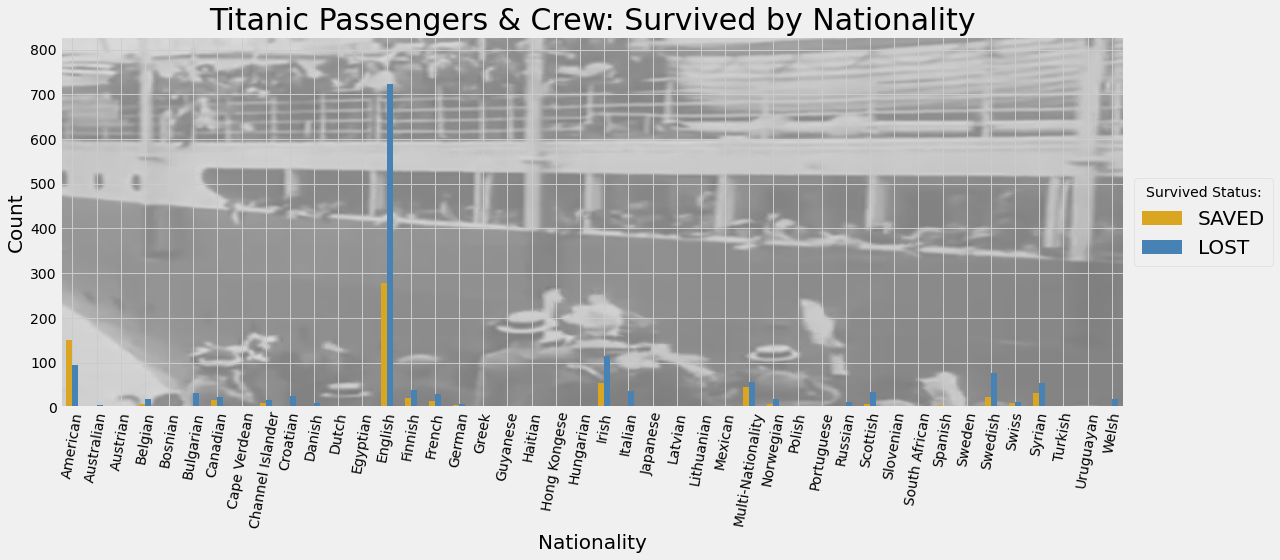

In [52]:
#Plot age data in bar chart
img = plt.imread("Data & Images- Original/LeavingPort.jpeg")
ax = nations_ready.plot.bar(subplots=False,
                         figsize=(18,8),
                         stacked=False,
                         color={"SAVED": "goldenrod", "LOST": "steelblue"})
plt.title("Titanic Passengers & Crew: Survived by Nationality", fontsize = 30)
plt.ylabel("Count", fontsize = 20)
plt.xlabel("Nationality", fontsize = 20)
plt.legend(title="Survived Status:",loc='center left',bbox_to_anchor=(1.0,0.5), fontsize = 20)
ax.imshow(img, extent=[-0.5, 45, 0, nations_sum*1.15], aspect='auto', alpha=.5)
#extent=(horizontal_min, horizontal_max, vertical_min, vertical_max)
ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 80)
plt.tight_layout()
#plt.grid()
plt.savefig("Data & Images- Results/nationality_bar_plot.png")

## Edit & Plot Joined

In [36]:
#Find unique Joined ports (Trip order: Belfast-Ireland, Southampton-England, Cherbourg-France, Queenstown-Ireland)
full_order.Joined.unique()

array(['Southampton', 'Cherbourg', 'Belfast', 'Queenstown'], dtype=object)

In [37]:
#Placed joined location in dataframe
joined = ['Belfast', 'Southampton', 'Cherbourg','Queenstown']
joined_group = full_order.groupby('Joined')['Survived'].value_counts().unstack().fillna(0).reindex(joined)
joined_change = joined_group.rename(index={'Belfast': 'Belfast, Ireland',
                          'Southampton': 'Southampton, England',
                          'Cherbourg': 'Cherbourg, France',
                          'Queenstown': 'Queenstown, Ireland'})
joined_ready = joined_change.reindex(columns=['SAVED','LOST'])
joined_ready

Survived,SAVED,LOST
Joined,,
"Belfast, Ireland",45,155
"Southampton, England",470,1144
"Cherbourg, France",153,118
"Queenstown, Ireland",44,79


In [38]:
#Find city data sum
joined_sum = joined_ready.max(axis=1).max()
joined_sum

1144

In [39]:
#Find city data total= 2,208
joined_total = joined_ready.sum(axis=0)
joined_total

Survived
SAVED     712
LOST     1496
dtype: int64

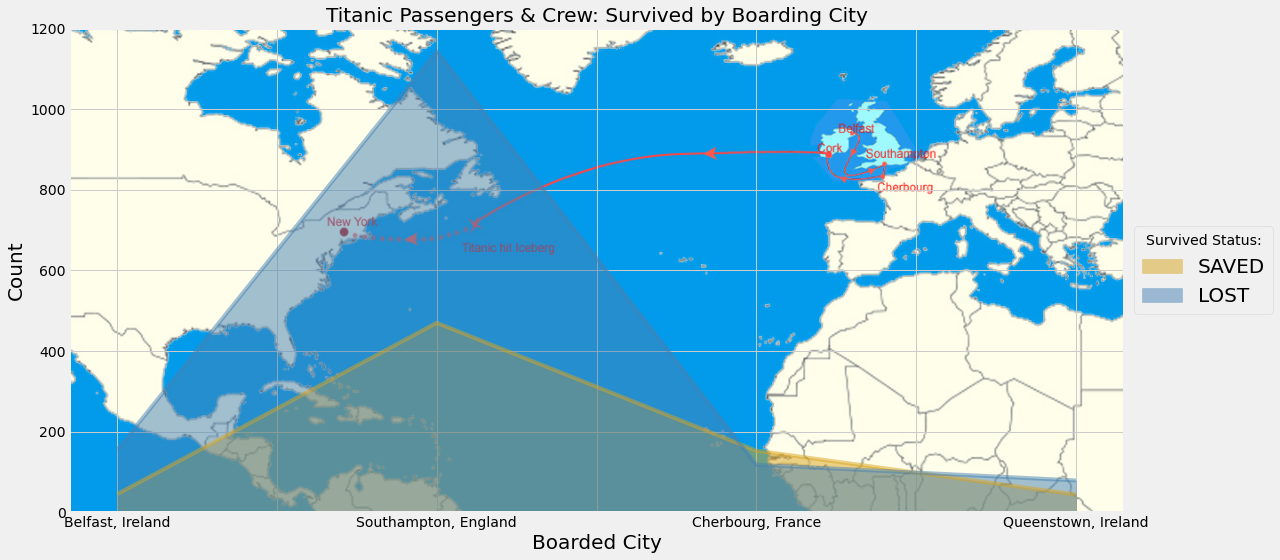

In [40]:
#Plot joined data in area plot
img = plt.imread("Data & Images- Original/TitanicMap.jpeg")
ax = joined_ready.plot.area(subplots=False,
                            figsize=(18,8),
                            stacked=False,color={"SAVED": "goldenrod", "LOST": "steelblue"})
plt.title("Titanic Passengers & Crew: Survived by Boarding City")
plt.ylabel("Count", fontsize = 20)
plt.xlabel("Boarded City", fontsize = 20)
plt.legend(title="Survived Status:",loc='center left',bbox_to_anchor=(1.0,0.5), fontsize = 20)
ax.imshow(img, extent=[-0.15, 3.15, 0, joined_sum*1.15], aspect='auto', alpha=1)
plt.tight_layout()
#plt.grid()
plt.savefig("Data & Images- Results/boardedcity_area_plot.png")

## Edit & Plot Class/Dept

In [41]:
#Find unique Class/Dept
full_order.ClassDept.unique()

array(['3rd Class Passenger', 'Victualling Crew', '2nd Class Passenger',
       'Engineering Crew', '2nd Class Passenger Servant',
       'Restaurant Staff', '1st Class Passenger', 'Deck Crew',
       '1st Class Passenger H&W Guarantee Group',
       '1st Class Passenger Servant', 'Engineering Crew Substitute Crew',
       'Deck Crew Titanic Officers',
       'Engineering Crew Failed to Join Ship',
       'Victualling Crew Failed to Join Ship',
       '2nd Class Passenger Musician',
       '1st Class Passenger Cross Channel Passenger',
       'Engineering Crew Deserted', 'Engineering Crew Left with Consent',
       '2nd Class Passenger H&W Guarantee Group',
       '2nd Class Passenger Cross Channel Passenger',
       'Victualling Crew Discharged Crew',
       'Restaurant Staff Failed to Join Ship',
       'Victualling Crew Postal Clerk', 'Engineering Crew Transferred',
       'Victualling Crew Left Ship Sick',
       'Victualling Crew Substitute Crew'], dtype=object)

In [42]:
#Define Person Type based on Class/Dept
def person_type (assigned):
    if 'Deserted' in assigned:
        return 'Not Onboard'
    
    elif 'Left' in assigned:
        return 'Not Onboard'
    
    elif 'Failed' in assigned:
        return 'Not Onboard'
    
    elif 'Officer' in assigned:
        return 'Officer'
    
    elif 'Victualling' in assigned:
        return 'Victualler'
    
    elif 'Engineering' in assigned:
        return 'Engineer'
    
    elif 'Restaurant Staff' in assigned:
        return 'Restaurant Staff'
    
    elif 'Deck Crew' in assigned:
        return 'Deck Crew'
    
    elif 'Musician' in assigned:
        return 'Musician'
    
    elif 'Servant' in assigned:
        return 'Servant'
    
    elif '1st Class' in assigned:
        return '1st Class'
    
    elif '2nd Class' in assigned:
        return '2nd Class'
    
    elif '3rd Class' in assigned:
        return '3rd Class'

In [43]:
#Apply Person Type based on Class/Dept
full_order['Type'] =full_order['ClassDept'].apply(person_type)
full_order

,PersonID,Name,Age,Gender,Nationality,Joined,ClassDept,Type,Survived
0,1,"ABBING, Mr Anthony",41,Male,American,Southampton,3rd Class Passenger,3rd Class,LOST
1,2,"ABBOTT, Mr Ernest Owen",21,Male,English,Southampton,Victualling Crew,Victualler,LOST
2,3,"ABBOTT, Mr Eugene Joseph",13,Male,American,Southampton,3rd Class Passenger,3rd Class,LOST
3,4,"ABBOTT, Mr Rossmore Edward",16,Male,"English, American",Southampton,3rd Class Passenger,3rd Class,LOST
4,5,"ABBOTT, Mrs Rhoda Mary 'Rosa'",39,Female,English,Southampton,3rd Class Passenger,3rd Class,SAVED
...,...,...,...,...,...,...,...,...,...
2472,2473,"ČULUMOVIć, Mr Jeso",17,Male,Croatian,Southampton,3rd Class Passenger,3rd Class,LOST
2473,2474,"ḤANNā AL-HāJ, Mr Mansūr",35,Male,Syrian,Cherbourg,3rd Class Passenger,3rd Class,LOST
2474,2475,"ḤANNā, Mr Mubārik Sulaymān Abī Āsī",27,Male,Syrian,Cherbourg,3rd Class Passenger,3rd Class,SAVED
2475,2476,"ṬANNūS MU'AWWAD, Mr Ḥannā",34,Male,"Syrian,American",Cherbourg,3rd Class Passenger,3rd Class,LOST


In [44]:
#Find unique Types
full_order.Type.unique()

array(['3rd Class', 'Victualler', '2nd Class', 'Engineer', 'Servant',
       'Restaurant Staff', '1st Class', 'Deck Crew', 'Officer',
       'Not Onboard', 'Musician'], dtype=object)

In [45]:
#Print all data
full_order.to_csv('Data & Images- Results/titanic_data.csv', index=False)
full_order.head()

,PersonID,Name,Age,Gender,Nationality,Joined,ClassDept,Type,Survived
0,1,"ABBING, Mr Anthony",41,Male,American,Southampton,3rd Class Passenger,3rd Class,LOST
1,2,"ABBOTT, Mr Ernest Owen",21,Male,English,Southampton,Victualling Crew,Victualler,LOST
2,3,"ABBOTT, Mr Eugene Joseph",13,Male,American,Southampton,3rd Class Passenger,3rd Class,LOST
3,4,"ABBOTT, Mr Rossmore Edward",16,Male,"English, American",Southampton,3rd Class Passenger,3rd Class,LOST
4,5,"ABBOTT, Mrs Rhoda Mary 'Rosa'",39,Female,English,Southampton,3rd Class Passenger,3rd Class,SAVED


In [46]:
#Find Not Onboard Count
onboard_count = full_order.groupby('Type').count()
onboard_count

,PersonID,Name,Age,Gender,Nationality,Joined,ClassDept,Survived
Type,,,,,,,,
1st Class,312,312,300,312,301,312,312,286
2nd Class,280,280,271,280,271,280,280,271
3rd Class,709,709,705,709,709,709,709,709
Deck Crew,88,88,87,88,86,88,88,58
Engineer,503,503,502,503,498,503,503,325
Musician,8,8,8,8,8,8,8,8
Not Onboard,20,20,20,20,18,20,20,0
Officer,10,10,10,10,10,10,10,8
Restaurant Staff,69,69,69,69,69,69,69,69


In [47]:
#Organize person types and drop not onboard, and reverse order for plot
# type_ppl = ['Officer',
#             'Victualler',
#             'Restaurant Staff',
#             'Deck Crew',
#             'Engineer',
#             'Musician',
#             'Servant',
#             '1st Class',
#             '2nd Class',
#             '3rd Class']
type_ppl = ['3rd Class',
            '2nd Class',
            '1st Class',
            'Servant',
            'Musician',
            'Engineer',
            'Deck Crew',
            'Restaurant Staff',
            'Victualler',
            'Officer']
type_change = full_order.groupby('Type')['Survived'].value_counts().unstack().fillna(0).reindex(type_ppl)
type_ready = type_change.reindex(columns=['SAVED','LOST'])
type_ready

Survived,SAVED,LOST
Type,,
3rd Class,181.0,528.0
2nd Class,117.0,154.0
1st Class,173.0,113.0
Servant,29.0,14.0
Musician,0.0,8.0
Engineer,72.0,253.0
Deck Crew,39.0,19.0
Restaurant Staff,3.0,66.0
Victualler,94.0,337.0


In [48]:
#Find type data sum
type_sum = type_ready.max(axis=1).max()
type_sum

528.0

In [49]:
#Find type data total= 2,208
type_total = type_ready.sum(axis=0)
type_total

Survived
SAVED     712.0
LOST     1496.0
dtype: float64

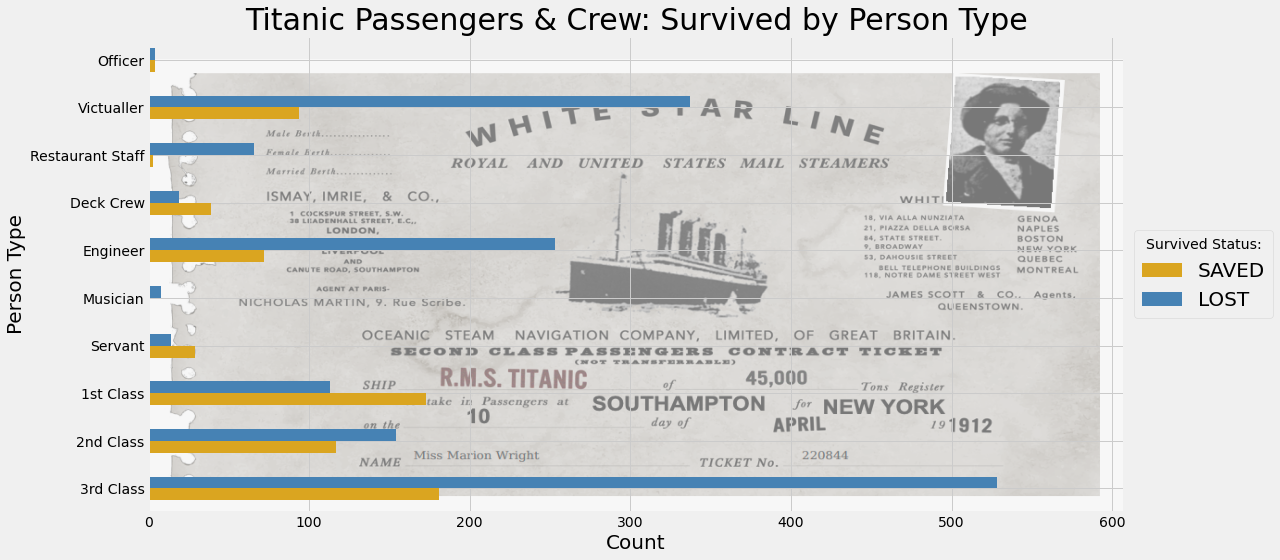

In [50]:
#Plot city data in barh chart
img = plt.imread("Data & Images- Original/PersonTicket.png")
ax = type_ready.plot.barh(subplots=False,
                          figsize=(18,8),
                          stacked=False,
                          color={"SAVED": "goldenrod", "LOST": "steelblue"})

plt.title("Titanic Passengers & Crew: Survived by Person Type", fontsize = 30)
plt.ylabel("Person Type", fontsize = 20)
plt.xlabel("Count", fontsize = 20)
plt.legend(title="Survived Status:",loc='center left',bbox_to_anchor=(1.0,0.5), fontsize = 20)
ax.imshow(img, extent=[0, type_sum*1.15, -.5, 9], aspect='auto', alpha=.5)
#extent=(horizontal_min, horizontal_max, vertical_min, vertical_max)
plt.tight_layout()
#plt.grid()
plt.savefig("Data & Images- Results/persontype_barh_plot.png")

### Miss Marion Wright was a 26 year old English woman who boarded the Titanic in Southampton, England. She was saved on boat 9.